### Algoritmos Genéticos - Variações
* eaMuPlusLambda
* eaMuCommaLambda
* eaSimple

In [ ]:
!pip install deap

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools

In [ ]:
# Gera o toolbox responsável por registrar as configurações do framewrok
toolbox = base.Toolbox()

In [ ]:
# Cria o tipo de função fitness e indivíduo
creator.create("Maximization", base.Fitness, weights=(1.0,))
creator.create("Genes", list,fitness=creator.Maximization)

# Registra os nomes e os tipos de individuo, fiteness e população
toolbox.register("Atributo", random.randint, 0, 1)
toolbox.register("Cromossomo", tools.initRepeat, creator.Genes, toolbox.Atributo, n=300 )
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Cromossomo)

In [ ]:
def fitnessFunction(chromosome):
    return sum(chromosome),

In [ ]:
# Parâmetros dos Algoritmos
prob_cx=0.8
prob_mt= 0.1
nger = 300
tamPop = 20

# Estratégia Evolutiva (Mu_Lambda)
mu = 20
_lambda = 20

In [ ]:
# Registra os operadores. Deve-se manter os nomes evaluate, mate, mutate e select
toolbox.register("evaluate", fitnessFunction)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)
toolbox.register("select", tools.selBest)

In [ ]:
# Gera o formato de análise estatística
st = tools.Statistics(key=lambda ind: ind.fitness.values)
st.register("Max", numpy.max)
st.register("Avg", numpy.mean)

In [ ]:
# Estratégia Evolutiva: Mu_Plus_Lambda
pop = toolbox.Populacao(n=mu)

# Executa o algoritmo eaMuPlusLambda
finalPop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu, _lambda, prob_cx, prob_mt, nger, stats = st, verbose=False)

# Imprime a melhor solucação da população final
melhorSolucao = tools.selBest(finalPop, 1)
print(f'Melhor Fitness: {melhorSolucao[0].fitness.values}')

Melhor Fitness: (261.0,)


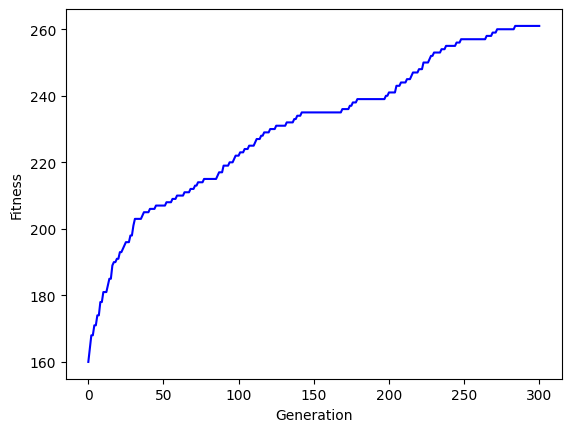

In [ ]:
# Plotagem das melhores soluções
import matplotlib.pyplot as plt

maxFit = log.select("Max")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [ ]:
# Estratégia Evolutiva: Mu_Comma_Lambda

# Define a quantidade de filhos
_lambda = 50

# Define o tamanho da População
pop = toolbox.Populacao(n=mu)

# Executa o algoritmo eaMuPlusLambda
finalPop, log = algorithms.eaMuCommaLambda(pop, toolbox, mu, _lambda, prob_cx, prob_mt, nger, stats = st, verbose=False)

# Imprime a melhor solucação da população final
melhorSolucao = tools.selBest(finalPop, 1)
print(f'Melhor Fitness: {melhorSolucao[0].fitness.values}')

Melhor Fitness: (291.0,)


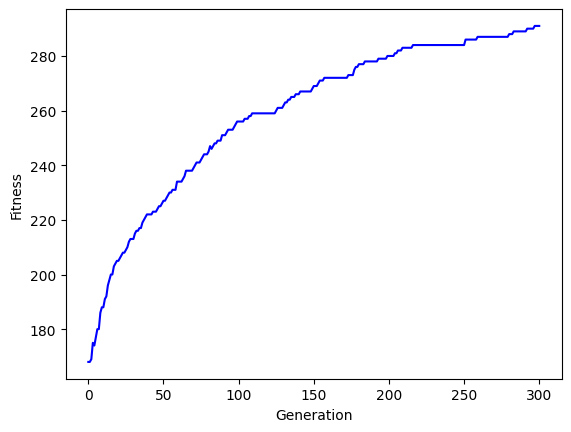

In [ ]:
# Plotagem das melhores soluções
import matplotlib.pyplot as plt

maxFit = log.select("Max")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [ ]:
# Algoritmo Genético

# Define o tamanho da População
pop = toolbox.Populacao(n=tamPop)

# Executa o algoritmo eaSimples
finalPop, log = algorithms.eaSimple(pop, toolbox, prob_cx, prob_mt, nger, stats=st, verbose=False)

# Imprime a melhor solucação da população final
melhorSolucao = tools.selBest(finalPop, 1)
print(f'Melhor Fitness: {melhorSolucao[0].fitness.values}')

Melhor Fitness: (216.0,)


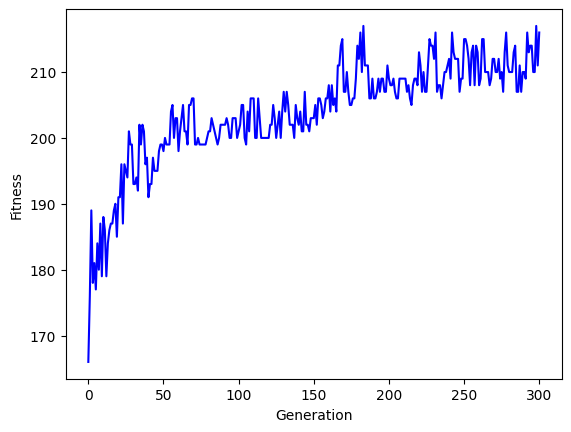

In [ ]:
# Plotagem das melhores soluções
import matplotlib.pyplot as plt

maxFit = log.select("Max")

plt.plot(maxFit, color='blue')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()